In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from torch.utils.data import DataLoader

In [3]:
from torchvision import datasets,models,transforms

In [4]:
from IPython.display import display
from PIL import Image
import os

In [5]:
path = "V:\\projects\\corona mask detector\\dataset\\"

In [6]:
im = Image.open('V:\\projects\\corona mask detector\\dataset\\train\\with mask\\8-with-mask.jpg') 

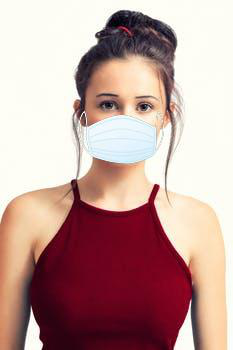

In [7]:
display(im)

In [8]:
imageNames = []
for folder,subfolder,filename in os.walk(path):
    for img in filename:
        imageNames.append(folder + "\\" + img)

In [9]:
train_transform = transforms.Compose([
    
    transforms.Grayscale(),
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor()
    
])

In [10]:
timg = train_transform(im)

In [11]:
timg = timg.reshape(1,1,224,224) 

In [12]:
conv1 = nn.Conv2d(1,6,3,1)  ## first step --->through kernel size image size reduces by 2
 ##second step --> through stride length image size is divided by stride length                           

In [13]:
a1 = F.relu(conv1(timg)) ## --> 224-2/1 = 222 
F.relu(conv1(timg)).shape 

torch.Size([1, 6, 222, 222])

In [14]:
x = F.max_pool2d(a1,2,2)
F.max_pool2d(a1,2,2).shape ## 222-1/2 = 110.5 ~ 111

torch.Size([1, 6, 111, 111])

In [15]:
conv2d = nn.Conv2d(6,16,3,1)

In [16]:
x = conv2d(x)  ## 111-2/1 = 109
x.shape

torch.Size([1, 16, 109, 109])

In [17]:
x = F.max_pool2d(x,2,2) ## 109-1/2
x.shape

torch.Size([1, 16, 54, 54])

In [19]:
((((224-2)-1)/2-2)-1)/2

53.75